In [1]:
from integrators import contact as ic
from integrators.common import rk4

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def integrate2pi(stepper, system, ndots, precision, p, q, s):
    r"""
    Integrate the system, saving only the points at t = 2 \pi k.
    """
    dt = np.pi/precision
    init = [p0, q0]
    
    solpq = np.empty([ndots, *np.shape(init)], dtype=np.float64)
    sols = np.empty(ndots, dtype=np.float64)
    tspan = np.empty(ndots, dtype=np.float64)
    
    t = 0
    for i in range((ndots-1)*2*precision+1):
        if i%(2*precision) == 0:
            idx = i//(2*precision)
            solpq[idx] = [p, q]
            sols[idx] = s
            tspan[idx] = t

        p, q, s, t = stepper(system, dt, p, q, s, t)

    return solpq, sols, tspan

The potential used for the Earth-Moon system can be found in [C90]. The forcing is described in [GEPC17].

In [4]:
class EarthMoon:
    def __init__(self, ecc, eps, o, l, a=0, mu=0):
        self.ecc = ecc
        self.eps = eps
        self.l = l
        self.o = o
        self.a = a
        self.mu = mu
        
        self.pref = lambda t: 1/(1+self.l*np.cos(self.o*t))

    def f(self, t):
        return -self.a-self.l*self.o*np.sin(self.o*t)*self.pref(t)
    
    def V(self, q, t):
        eps = self.eps
        ecc = self.ecc
        return -eps*self.pref(t)*(
                (-ecc/4 + ecc**3/32)*np.cos(2*q - t)
                + (1/2 -5/4 *ecc**2 + 13/32 * ecc**4)*np.cos(2*q - 2*t)
                + (7/4 *ecc - 123/32 * ecc**3)*np.cos(2*q - 3*t)
                + (17/4 *ecc**2 - 115/12 * ecc**4)*np.cos(2*q - 4*t)
                + (845/96 *ecc**3 - 32525/1536 * ecc**5)*np.cos(2*q - 5*t)
                + 533/32 * ecc**4 *np.cos(2*q - 6*t)
                + 228347/7608* ecc**5*np.cos(2*q - 7*t) - self.mu*q
            )
        
    def Vq(self, q, t):
        eps = self.eps
        ecc = self.ecc
        return 2*eps*self.pref(t)*(
                (-ecc/4 + ecc**3/32)*np.sin(2*q - t)
                + (1/2 -5/4 *ecc**2 + 13/32 * ecc**4)*np.sin(2*q - 2*t)
                + (7/4 *ecc - 123/32 * ecc**3)*np.sin(2*q - 3*t)
                + (17/4 *ecc**2 - 115/12 * ecc**4)*np.sin(2*q - 4*t)
                + (845/96 *ecc**3 - 32525/1536 * ecc**5)*np.sin(2*q - 5*t)
                + 533/32 * ecc**4 *np.sin(2*q - 6*t)
                + 228347/7608* ecc**5*np.sin(2*q - 7*t)
            ) - self.mu

# Phase space sections

In what follows we reproduce the phase space section from [GEPC17].

## Periodic moment of intertia in resonance with the orbit

In [5]:
precision = 10
ndots = 100
dt = np.pi/precision

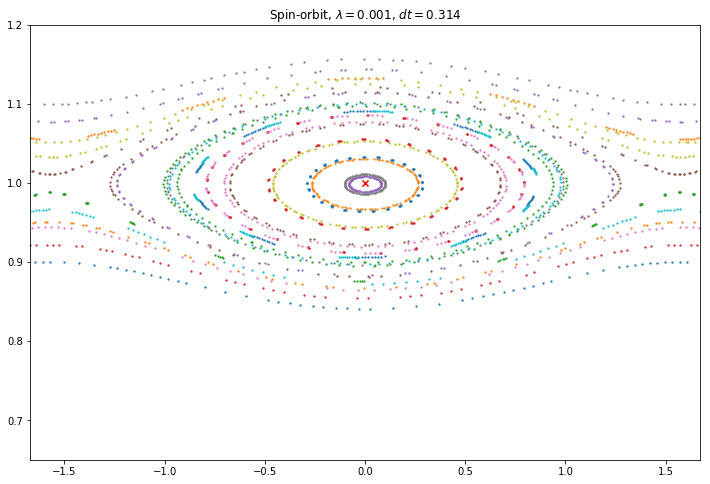

In [6]:
lam = 0.001
em = EarthMoon(0.01, 3/4*0.01, 1, lam)

plt.figure(figsize=(12,8))

for (p0, q0) in [(p,q) for p in np.linspace(0.9,1.1,10) for q in [np.pi/2, -np.pi/4, 0.0]]:
    # replace ic.step with ic.step6 to use the 6th order hamiltonian method.
    # Even with the current large timestep, there is no qualitative difference.
    sol, sols_, tspan = integrate2pi(ic.step, em, ndots, precision, p0, q0, 0.0)
    plt.scatter(np.mod(sol[:,1]+np.pi, 2*np.pi)-np.pi, sol[:,0], s=1.5)

plt.title(f"Spin-orbit, $\lambda = {lam}$, $dt = {dt:1.3f}$")
plt.xlim((-0.1-np.pi/2, +0.1+np.pi/2))
plt.ylim((0.65, 1.2))
plt.scatter(0.0, 1.0, c='r', marker='x')
plt.show()

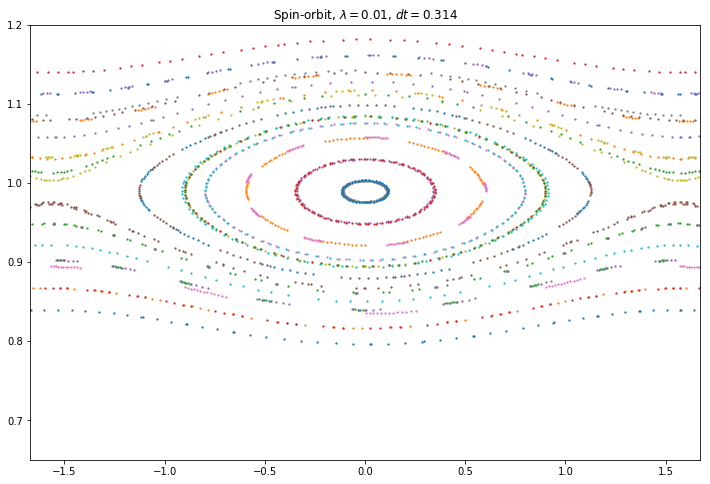

In [7]:
lam = 0.01
em = EarthMoon(0.01, 3/4*0.01, 1, lam)

plt.figure(figsize=(12,8))

for (p0, q0) in [(p,q) for p in np.linspace(0.84,1.14,12) for q in [np.pi/2, -np.pi/4, 0.0]]:
    # replace ic.step with ic.step6 to use the 6th order hamiltonian method.
    # Even with the current large timestep, there is no qualitative difference.
    sol, sols_, tspan = integrate2pi(ic.step, em, ndots, precision, p0, q0, 0.0)
    plt.scatter(np.mod(sol[:,1]+np.pi, 2*np.pi)-np.pi, sol[:,0], s=1.5)

plt.title(f"Spin-orbit, $\lambda = {lam}$, $dt = {dt:1.3f}$")
plt.xlim((-0.1-np.pi/2, +0.1+np.pi/2))
plt.ylim((0.65, 1.2))
plt.show()

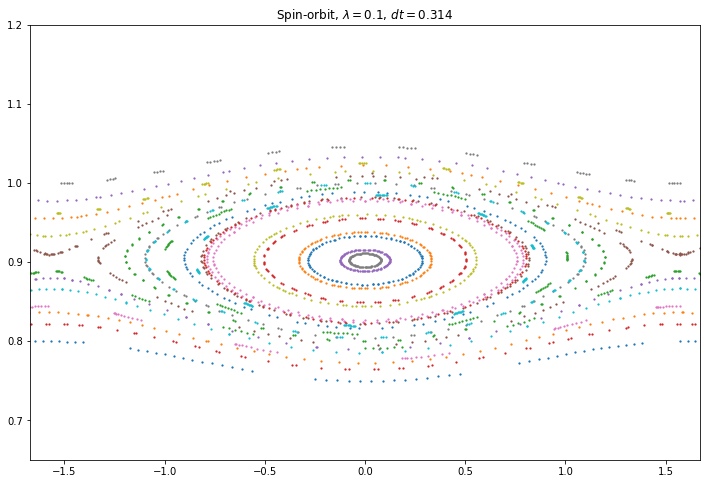

In [8]:
lam = 0.1
em = EarthMoon(0.01, 3/4*0.01, 1, lam)

plt.figure(figsize=(12,8))

for (p0, q0) in [(p,q) for p in np.linspace(0.8,1.0,10) for q in [np.pi/2, -np.pi/4, 0.0]]:
    # replace ic.step with ic.step6 to use the 6th order hamiltonian method.
    # Even with the current large timestep, there is no qualitative difference.
    sol, sols_, tspan = integrate2pi(ic.step, em, ndots, precision, p0, q0, 0.0)
    plt.scatter(np.mod(sol[:,1]+np.pi, 2*np.pi)-np.pi, sol[:,0], s=1.5)

plt.title(f"Spin-orbit, $\lambda = {lam}$, $dt = {dt:1.3f}$")
plt.xlim((-0.1-np.pi/2, +0.1+np.pi/2))
plt.ylim((0.65, 1.2))
plt.show()

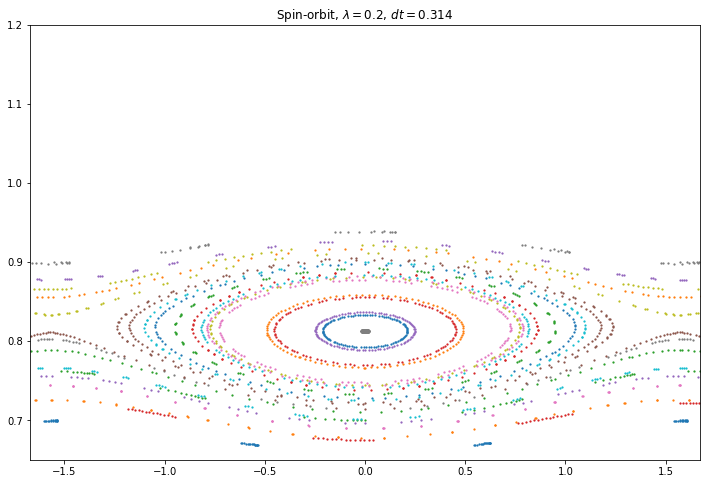

In [9]:
lam = 0.2
em = EarthMoon(0.01, 3/4*0.01, 1, lam)

plt.figure(figsize=(12,8))

for (p0, q0) in [(p,q) for p in np.linspace(0.7,0.9,10) for q in [np.pi/2, -np.pi/4, 0.0]]:
    # replace ic.step with ic.step6 to use the 6th order hamiltonian method.
    # Even with the current large timestep, there is no qualitative difference.
    sol, sols_, tspan = integrate2pi(ic.step, em, ndots, precision, p0, q0, 0.0)
    plt.scatter(np.mod(sol[:,1]+np.pi, 2*np.pi)-np.pi, sol[:,0], s=1.5)

plt.title(f"Spin-orbit, $\lambda = {lam}$, $dt = {dt:1.3f}$")
plt.xlim((-0.1-np.pi/2, +0.1+np.pi/2))
plt.ylim((0.65, 1.2))
plt.show()

In [10]:
## Periodic moment of intertia, non-resonant with the orbit

In [11]:
theta = np.sqrt(2)

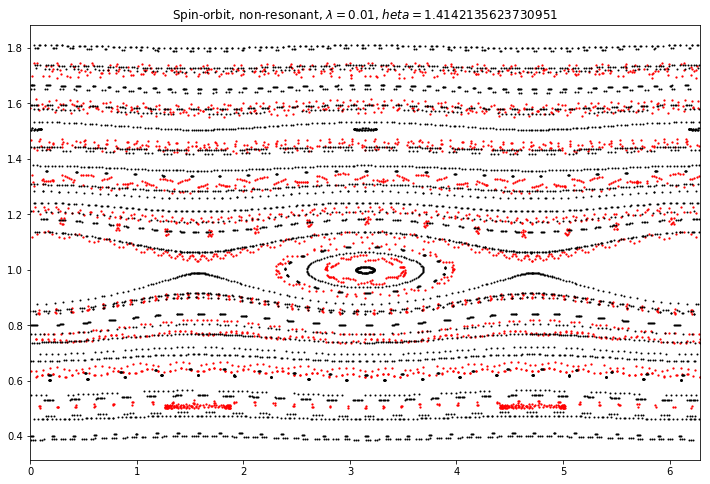

In [12]:
lam = 0.01
em = EarthMoon(0.01, 3/4*0.01, theta, lam)

plt.figure(figsize=(12,8))

for (p0, q0) in [(p,q) for p in np.linspace(0.5,1.7,10) for q in [np.pi/2, np.pi, 3*np.pi/2]]:
    sol, sols_, tspan_ = integrate2pi(ic.step, em, ndots, precision, p0, q0, 0.0)
    plt.scatter(np.mod(sol[:,1], 2*np.pi), sol[:,0], s=1.5, c='r')

em_nc = EarthMoon(0.01, 3/4*0.01, theta, 0)
for (p0, q0) in [(p,q) for p in np.linspace(0.4,1.8,20) for q in [np.pi/2, np.pi, 3*np.pi/2]]:
    sol, sols_, tspan_ = integrate2pi(ic.step, em_nc, ndots, precision, p0, q0, 0.0)
    plt.scatter(np.mod(sol[:,1], 2*np.pi), sol[:,0], s=1, c='k')
    
plt.title(f"Spin-orbit, non-resonant, $\lambda = {lam}$, $\theta = {theta}$")
plt.xlim((0., 2*np.pi))
plt.show()

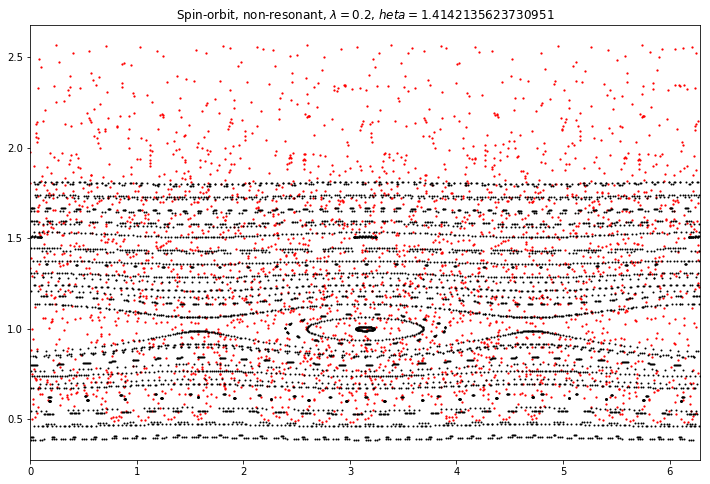

In [13]:
lam = 0.2
em = EarthMoon(0.01, 3/4*0.01, theta, lam)

plt.figure(figsize=(12,8))

for (p0, q0) in [(p,q) for p in np.linspace(0.5,1.7,10) for q in [np.pi/2, np.pi, 3*np.pi/2]]:
    sol, sols_, tspan_ = integrate2pi(ic.step, em, ndots, precision, p0, q0, 0.0)
    plt.scatter(np.mod(sol[:,1], 2*np.pi), sol[:,0], s=1.5, c='r')

em_nc = EarthMoon(0.01, 3/4*0.01, theta, 0)
for (p0, q0) in [(p,q) for p in np.linspace(0.4,1.8,20) for q in [np.pi/2, np.pi, 3*np.pi/2]]:
    sol, sols_, tspan_ = integrate2pi(ic.step, em_nc, ndots, precision, p0, q0, 0.0)
    plt.scatter(np.mod(sol[:,1], 2*np.pi), sol[:,0], s=1, c='k')
    
plt.title(f"Spin-orbit, non-resonant, $\lambda = {lam}$, $\theta = {theta}$")
plt.xlim((0., 2*np.pi))
plt.show()

# Capture into synchronous resonance

In [14]:
lam = 0.0001
em = EarthMoon(0.01, 3/4*0.01, 1, lam, a = -0.001, mu = 0.001)
precision = 10
dt = np.pi/precision
tf = 10000

plot_every = 20
full = int(np.floor(tf/dt))

npts = int(np.floor(full/plot_every))+1

sol = np.empty([npts, 3], dtype=np.float64)
tspan = np.empty(npts, dtype=np.float64)

p, q, s, t = 3, 2.7, 0 , 0

for i in range(full):
    if i%plot_every == 0:
        sol[i//plot_every] = [p, q, s]
        tspan[i//plot_every] = t

    p, q, s, t = ic.step(em, dt, p, q, s, t)

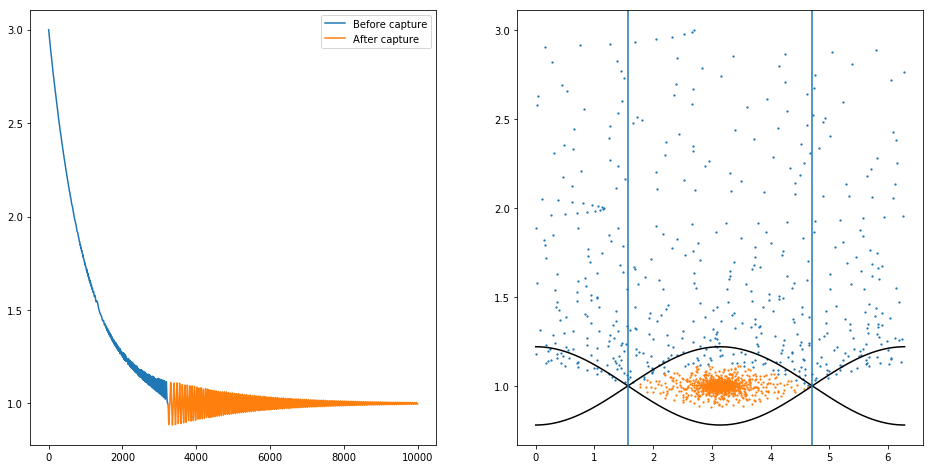

In [15]:
plt.figure(figsize=(16,8))

cut = -1077
plt.subplot(121)
plt.plot(tspan[:cut], 
         sol[:cut,0],
         label="Before capture")
plt.plot(tspan[cut-1:], 
         sol[cut-1:,0],
         label="After capture")
plt.legend()

plt.subplot(122)
plt.scatter(
    np.mod(sol[:cut,1], 2*np.pi), 
    sol[:cut,0],
    label="Before capture", s=1.5
)
plt.scatter(
    np.mod(sol[cut-1:,1], 2*np.pi), 
    sol[cut-1:,0],
    label="After capture", s=1.5
)

x = np.linspace(0,2*np.pi,150)
plt.plot(x, 0.22*np.cos(x)+1, 'k')
plt.plot(x, -0.22*np.cos(x)+1, 'k')

plt.axvline(x=np.pi/2)
plt.axvline(x=3*np.pi/2)
plt.show()

## References

[C90] Celletti, A.: "Analysis of resonances in the spin-orbit problem in Celestial Mechanics: The synchronous resonance (Part I)". _ZAMP_ 41 (1990)

[GEPC17] Gkolias I., Efthymiopoulos C., Pucacco G., Celletti, A.: "Hamiltonian formulation of the spin-orbit model with time-varying non-conservative forces". Comm. Nonlinear Sci. Numer. Simulat. 51 (2017)